# Constant Likelihood

Managing plateaus in nested sampling is tricky because the measure of enclosed prior volume is assumed to be monotonically decreasing. In this simple model, the model is simply,

$L(x) = P(y | x) = 1$

and

$P(x) = \mathcal{U}[x \mid 0, 1]$.

The analytic evidence for this model is,

$Z = P(y) = \int_\mathcal{X} L(x) p(x) \,\mathrm{d} x = 1$

In [1]:

import tensorflow_probability.substrates.jax as tfp
from jax import random

from jaxns import Model, Prior, TerminationCondition

tfpd = tfp.distributions

INFO[2023-12-11 12:57:14,185]: Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO[2023-12-11 12:57:14,185]: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO[2023-12-11 12:57:14,186]: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
WARNING[2023-12-11 12:57:14,187]: An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [2]:

def log_likelihood(theta):
    return 0.


def prior_model():
    x = yield Prior(tfpd.Uniform(0., 1.), name='x')
    return x


model = Model(prior_model=prior_model,
              log_likelihood=log_likelihood)

log_Z_true = 0.
print(f"True log(Z)={log_Z_true}")


True log(Z)=0.0


In [3]:
from jaxns import DefaultNestedSampler

# Create the nested sampler class. In this case without any tuning.
exact_ns = DefaultNestedSampler(model=model, max_samples=1e4)

termination_reason, state = exact_ns(random.PRNGKey(42))
results = exact_ns.to_results(termination_reason=termination_reason, state=state)


/home/albert/miniconda3/envs/jaxns_py/lib/python3.11/site-packages/jax/_src/ops/scatter.py:94: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn("scatter inputs have incompatible types: cannot safely cast "


In [4]:
# We can use the summary utility to display results
exact_ns.summary(results)

--------
Termination Conditions:
All live-points are on a single plateau (potential numerical errors, consider 64-bit)
--------
likelihood evals: 64
samples: 64
phantom samples: 0.0
likelihood evals / sample: 1.0
phantom fraction (%): 0.0%
--------
logZ=-0.023 +- 0.017
H=1.0
ESS=32.36590576171875
--------
x: mean +- std.dev. | 10%ile / 50%ile / 90%ile | MAP est. | max(L) est.
x: 0.51 +- 0.31 | 0.1 / 0.44 / 0.9 | 0.39 | 0.39
--------


WARNING[2023-12-11 12:57:20,139]: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


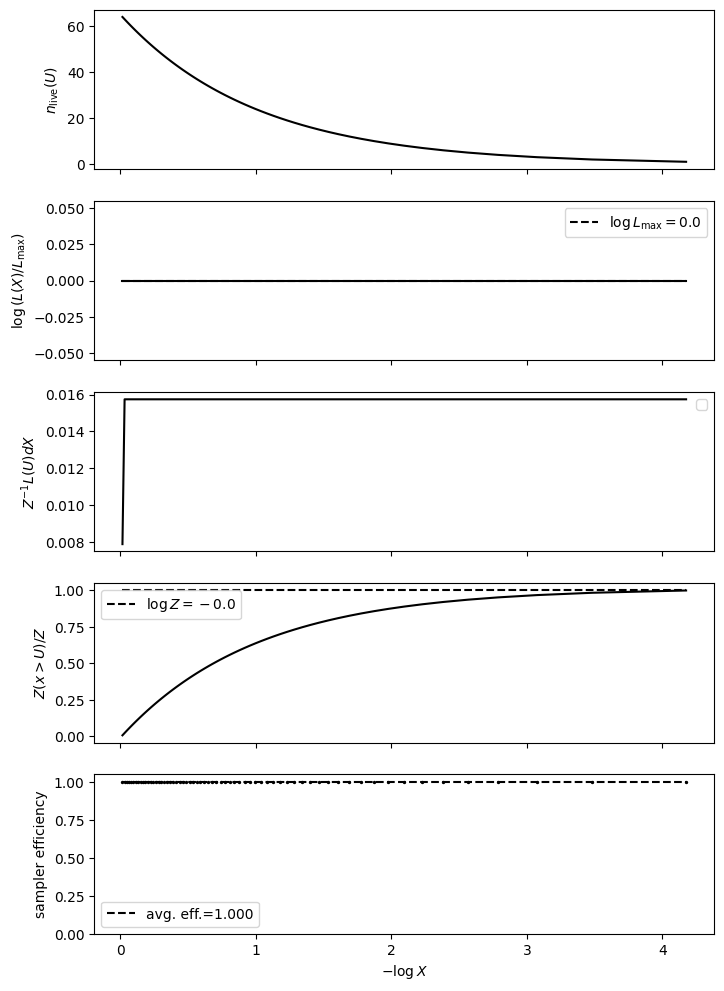

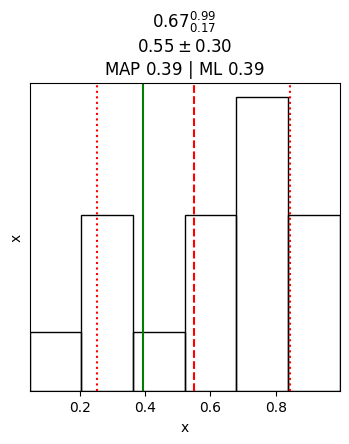

In [5]:
# We plot useful diagnostics and a distribution cornerplot
exact_ns.plot_diagnostics(results)
exact_ns.plot_cornerplot(results)